## Symmetry Operations, Point Groups, and Multiplication Tables

Symmetry is useful in chemistry for a lot of reason -- often it can provide information about a molecule's quantum state without requiring a solution to the Schrodinger equation. Molecules with symmetry may have any of the following symmetry elements:

1. An Identity (denoted as $E$) -- which, by definition, all molecules have
2. n-fold axis or axes of symmetry (denoted as $C_n$)
3. mirror plane(s) of symmetry (denoted as $\sigma$)
4. a center of symmetry (denoted as $i$) -- 
5. n-fold rotation-reflection axis or axes of symmetry (denoted $S_n$)

Molecules that share the same symmetry elements (for example, tetrahedrons like methane and ammonium) form what are called point groups. Each of the symmetry elements within a point group can be represented as a matrix in 3D Cartesian space, and matrix notation is particularly convenient because multiplication of any matrices will generate the new locations of any points that were transformed by the symmetry operation. For example, the operation of rotating of a water molecule (which consists of 3 atoms, all with 3 degrees of freedom) around its $C_2$ axis is represented by the following matrix muliplication:

$$ \begin{bmatrix} 1 & 0 & 0 \\0 & 1 & 0 \\0 & 0 & 1 \end{bmatrix} \begin{bmatrix} -1 & 0 & 0 \\0 & -1 & 0 \\0 & 0 & 1 \end{bmatrix} = \begin{bmatrix} -1 & 0 & 0 \\0 & -1 & 0 \\0 & 0 & 1 \end{bmatrix}$$

In this example, the new 3x3 matrix consists of 3 vectors, each representing the new Cartesian coordinates for the different atoms in the water molecule. Also note that this matrix multiplication produces the matrix representation of the $C_2$ symmetry operation -- In general, multiplying any two matrices corresponding to two symmetry operations in a point group will lead to a matrix of another symmetry operation within the same point group. And, for any given point group, the successive application of any series of operations can be summarized in a multiplication table. Lets look at an example of a multiplication table.

## Example: $C_{3v}$ Point Group Multiplication Table

Let's look at the $C_{3v}$ point group, for which ammonia is a great example. For any symmetry operation performed on ammonia, the nitrogen atom remains fixed, but the hydrogen atoms can translate in as many as 3! = 6 different ways -- in particular, by either a sequential rotation around its principle axis or by reflection over 3 equivalent, vertical mirror planes. If we designate each hydrogen atom as either # 1, 2, or 3, then the results of the six possible symmetry operations can be described as follows:

the identity operation:  $ E\left(1,2,3\right) = \left(1,2,3\right) $, an operation that results in no change,

the $C_3$ operation: $C_3\left(1,2,3\right) = \left(2,3,1\right)$, an operation that causes all 3 hydrogen atoms move

another $C_3^2$ operation: $C_3^2\left(1,2,3\right) = \left(3,1,2\right)$, which produces a  result similar to that of the $C_3$ operation

and three reflection operations, which each only cause two of the three hydrogen atoms to change positions,

$\sigma_1$ operation: $\sigma_1\left(1,2,3\right) = \left(1,3,2\right)$, 

$\sigma_2$ operation: $\sigma_2\left(1,2,3\right) = \left(3,2,1\right)$,

$\sigma_3$ operation: $\sigma_3\left(1,2,3\right) = \left(2,1,3\right)$.



In [53]:
class Group:
    def __init__(self, elements, operation, table_name_map):
        """
        elements:       elements of the group
        operation:      operation on group
        table_name_map: map for cayley table to prettify any complex objects in groups for printing
        """
        self.elements = elements
        self.operation = operation
        self.table_name_map = table_name_map
        self.id = None #placeholder to find group identity later
    
    def compose(self, e1, e2):
        """
        e1: element 1 of composition
        e2: element 2 of composition
        returns the composition of e1 and e2. read "e1 o e2"
        """
        if (e1 not in self.elements) or (e2 not in self.elements):
            raise Exception('Elements not in group.')
        value = self.operation(e1, e2)
        if value not in self.elements:
            raise Exception('Closure does not hold for {0} + {1} = {2}.'.format(e1,e2,value))
        return value
        
    def identity(self):
        """
        Gets the identity of the group
        """
        if self.id:
            return self.id #if already found return
        for element in self.elements:
            for test_element in self.elements:
                if not (self.compose(element, test_element) == test_element):
                    break
            self.id = element
            return element
        raise Exception('No identity, not a group')

    def inverse(self, e):
        """
        e: element to find inverse
        """
        for element in self.elements:
            if self.compose(e, element) == self.identity():
                return element
        raise Exception('No inverse for {0}, not a group'.format(e)) 

    def __repr__(self):
        longest = max(len(str(v)) for k,v in self.table_name_map.items()) + 2
        def cell(data,filler=' '):
            return '{message:{fill}{align}{width}}'.format(
               message=data,
               fill=filler,
               align='^',
               width=longest
            )
        def data_cell(e):
            return cell(str(self.table_name_map[e]))
        vert_sepr = '|' #vertical bar separator
        def hori_sepr(char): #horizontal row separator
            return cell('',filler=char)
        def row_sepr(char): #row separator
            return (hori_sepr(char) + vert_sepr * 2) + ((hori_sepr(char) + vert_sepr) * len(self.elements)) + '\n'

        cayley = cell('o') + vert_sepr * 2
        for header in self.elements:
            cayley += data_cell(header) + vert_sepr
        cayley += '\n' + row_sepr('=')

        for row in self.elements:
            line = (data_cell(row) + vert_sepr * 2)
            for column in self.elements:
                line += data_cell(self.compose(row,column)) + vert_sepr
            cayley += line + '\n' + row_sepr('-')
        return cayley



if __name__ == '__main__':

    #group C_3v #example: ammonia

    E = ((1,2,3),(1,2,3)) #identity operation 
    C3_1 = ((1,2,3),(2,3,1)) # 120 degree rotation around the z axis (clockwise or counterclockwise)
    C3_2 = ((1,2,3),(3,1,2)) # a second 120 degree rotation around the z axis
    o1 = ((1,2,3),(1,3,2)) # Reflection over the first of the three N-H bonds
    o2 = ((1,2,3),(3,2,1)) # Reflection over the second N-H bond
    o3 = ((1,2,3),(2,1,3)) # Reflection over the third N-H bond
    
    S = (E,C3_1,C3_2,o1,o2,o3) #all point group operations
    
    name_map = { S[i] : "S{0}".format(i) for i in range(0,len(S)) }
    
    #multiplying operations in C_3v group
    
    def map(e1,e2):
        return ((1,2,3), tuple( e1[1][e1[0].index(i)] for i in e2[1] ) )
    C3v = Group(S, map, name_map)
    print("C_3v")
    print(C3v)
    
    print("S0 = identity operation")
    print("S1 = C3_1 operation")
    print("S2 = C3_2 operation")
    print("S3 = o1 operation")
    print("S4 = o2 operation")
    print("S5 = o3 operation")
    
    print("Identity: {0}".format(C3v.identity()))
    
    print("Inverse of C3_1: {0}".format(name_map[C3v.inverse(C3_1)]))
    print("Inverse of C3_2: {0}".format(name_map[C3v.inverse(C3_2)]))


C_3v
 o  || S0 | S1 | S2 | S3 | S4 | S5 |
====||====|====|====|====|====|====|
 S0 || S0 | S1 | S2 | S3 | S4 | S5 |
----||----|----|----|----|----|----|
 S1 || S1 | S2 | S0 | S5 | S3 | S4 |
----||----|----|----|----|----|----|
 S2 || S2 | S0 | S1 | S4 | S5 | S3 |
----||----|----|----|----|----|----|
 S3 || S3 | S4 | S5 | S0 | S1 | S2 |
----||----|----|----|----|----|----|
 S4 || S4 | S5 | S3 | S2 | S0 | S1 |
----||----|----|----|----|----|----|
 S5 || S5 | S3 | S4 | S1 | S2 | S0 |
----||----|----|----|----|----|----|

S0 = identity operation
S1 = C3_1 operation
S2 = C3_2 operation
S3 = o1 operation
S4 = o2 operation
S5 = o3 operation
Identity: ((1, 2, 3), (1, 2, 3))
Inverse of C3_1: S2
Inverse of C3_2: S1


## Practice

Reproduce the multiplication tables for water and boric acid.

## Symmetry Operations Don't Just Apply to Translational and Rotational Motion

Symmetry also applies to vibrational and electronic transitions (among other things). Interestingly, we can predict which electronic or vibronic transitions are forbidden as a result of symmetry, and we can also predict the number of peaks that will appear in an IR or Raman spectra by identifying the symmetry of the vibrational normal modes of any polyatomic molecule.

### Normal Modes

Every normal mode has a certain type of symmetry associated with it. To determine the symmetries of these vibrations, we perform all of the possible symmetry matrix operations on the molecular coordinates of each atom within a given molecule. 

For $H_2O$ (which belongs to the point group $C_{2v}$ and has the symmetry elements E, $C_2$, $\sigma_{xz}$, and $\sigma_{yz}$), this process yields us three normal modes. We should expect this, as we can assume $3N-6$ modes for a nonlinear molecule (due to the 3 degrees of freedom of each atom and the 6 possible directions of translational and rotational motions of the molecule, which we don't care about for this analysis), but specifically, the three normal modes for $H_2O$ include two stretching modes and a bending mode.

***Symmetric Stretch***

(-2, 2)

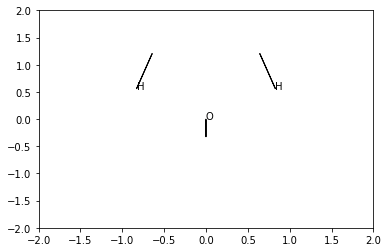

In [15]:
import matplotlib.pyplot as plt
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(h1[0],h1[1],v[0,-3],v[1,-3],fc='r')
plt.arrow(o2[0],o2[1],v[3,-3],v[4,-3],fc='r')
plt.arrow(h3[0],h3[1],v[6,-3],v[7,-3],fc='r')
plt.text(h1[0],h1[1],'H')
plt.text(o2[0],o2[1],'O')
plt.text(h3[0],h3[1],'H')
plt.xlim(-2,2)
plt.ylim(-2,2)

***Asymmetric Stretch***

(-2, 2)

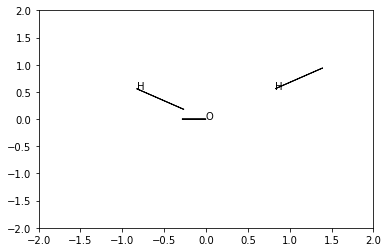

In [10]:
import matplotlib.pyplot as plt
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(h1[0],h1[1],v[0,-2],v[1,-2],fc='r')
plt.arrow(o2[0],o2[1],v[3,-2],v[4,-2],fc='r')
plt.arrow(h3[0],h3[1],v[6,-2],v[7,-2],fc='r')
plt.text(h1[0],h1[1],'H')
plt.text(o2[0],o2[1],'O')
plt.text(h3[0],h3[1],'H')
plt.xlim(-2,2)
plt.ylim(-2,2)

***Symmetric Bend***

(-2, 2)

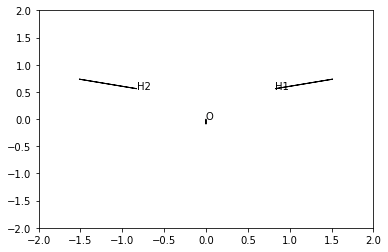

In [13]:
import matplotlib.pyplot as plt
#ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
plt.arrow(h1[0],h1[1],v[0,-1],v[1,-1],fc='r')
plt.arrow(o2[0],o2[1],v[3,-1],v[4,-1],fc='r')
plt.arrow(h3[0],h3[1],v[6,-1],v[7,-1],fc='r')
plt.text(h1[0],h1[1],'H1')
plt.text(o2[0],o2[1],'O')
plt.text(h3[0],h3[1],'H2')
plt.xlim(-2,2)
plt.ylim(-2,2)